In [1]:
# And the standard data science data manipulation imports
import pandas as pd
import numpy as np

# Bring in a plotting library
import matplotlib.pyplot as plt
%matplotlib inline

observations=pd.read_csv("assets/observations.csv", index_col=0)
observations.head()

,away_cap,away_last_season_conferenceHomeRank,away_last_season_conferenceL10Rank,away_last_season_conferenceRank,away_last_season_conferenceRoadRank,away_last_season_divisionHomeRank,away_last_season_divisionL10Rank,away_last_season_divisionRank,away_last_season_divisionRoadRank,away_last_season_gamesPlayed,...,home_last_season_ppConferenceRank,home_last_season_ppDivisionRank,home_last_season_ppLeagueRank,home_last_season_row,home_last_season_streak.streakNumber,home_last_season_team.id,home_last_season_wildCardRank,home_lost,home_won,outcome_categorical
20171006_173713,72821399.0,10.0,7.0,8.0,7.0,4.0,4.0,4.0,4.0,82.0,...,9.0,5.0,20.0,37.0,7.0,52.0,3.0,0.0,0.0,away
20171008_080732,71891679.0,7.0,4.0,5.0,4.0,4.0,2.0,3.0,3.0,82.0,...,2.0,2.0,2.0,46.0,2.0,5.0,0.0,0.0,0.0,away
20171008_080734,73824956.0,9.0,11.0,7.0,5.0,4.0,5.0,4.0,2.0,82.0,...,4.0,2.0,7.0,43.0,3.0,22.0,0.0,0.0,0.0,home
20171008_160734,73546558.0,4.0,4.0,11.0,14.0,4.0,3.0,6.0,7.0,82.0,...,5.0,3.0,10.0,44.0,1.0,28.0,0.0,0.0,0.0,away
20171009_153739,69429301.0,5.0,6.0,8.0,10.0,3.0,4.0,4.0,5.0,82.0,...,7.0,3.0,13.0,42.0,1.0,6.0,0.0,0.0,0.0,home


In [2]:
# Perhaps the biggest question to ecological validity - that is, the validity of this
# model for real world work, like winning our office pool bets - is how well does it work
# over time? In our first modeling approach we broke our training and test sets into two
# pieces, a roughly ~800/450 split. Don't we want to dominate our office colleagues right
# from the first game of the season though? :)

# Let's look at the accuracy of this model over time. The index of the observations DataFrame
# is in the format of yyymmdd_time, but for the sake of the pool we probably want to break
# this into daily observations. I'm going to use a regular expression to do this, but you
# can look at the str.split module or writer iterative code as well
observations["date"]=observations.index.str.extract(r"(?P<date>[\d]*)(?:[\w]*)",expand=False)
observations.head()

,away_cap,away_last_season_conferenceHomeRank,away_last_season_conferenceL10Rank,away_last_season_conferenceRank,away_last_season_conferenceRoadRank,away_last_season_divisionHomeRank,away_last_season_divisionL10Rank,away_last_season_divisionRank,away_last_season_divisionRoadRank,away_last_season_gamesPlayed,...,home_last_season_ppDivisionRank,home_last_season_ppLeagueRank,home_last_season_row,home_last_season_streak.streakNumber,home_last_season_team.id,home_last_season_wildCardRank,home_lost,home_won,outcome_categorical,date
20171006_173713,72821399.0,10.0,7.0,8.0,7.0,4.0,4.0,4.0,4.0,82.0,...,5.0,20.0,37.0,7.0,52.0,3.0,0.0,0.0,away,20171006
20171008_080732,71891679.0,7.0,4.0,5.0,4.0,4.0,2.0,3.0,3.0,82.0,...,2.0,2.0,46.0,2.0,5.0,0.0,0.0,0.0,away,20171008
20171008_080734,73824956.0,9.0,11.0,7.0,5.0,4.0,5.0,4.0,2.0,82.0,...,2.0,7.0,43.0,3.0,22.0,0.0,0.0,0.0,home,20171008
20171008_160734,73546558.0,4.0,4.0,11.0,14.0,4.0,3.0,6.0,7.0,82.0,...,3.0,10.0,44.0,1.0,28.0,0.0,0.0,0.0,away,20171008
20171009_153739,69429301.0,5.0,6.0,8.0,10.0,3.0,4.0,4.0,5.0,82.0,...,3.0,13.0,42.0,1.0,6.0,0.0,0.0,0.0,home,20171009


In [14]:
# Now that we have observations by date, we can build predictive models on a day by day basis.
# Essentially, for each date we want to build a model which considers all of the data which
# comes before it season and use that to predict the outcomes for the given date.

# We're going to use the pandas groupby() function along with the apply() function. Together,
# these functions will create a small DataFrame for each date in our data and allow us to
# apply a single function to that data. The result of our function should be some accuracy
# value as to how well our model actually performed
def model_by_date(date_observations, features_list):
    '''Takes a DataFrame of observations and uses it as a testing set for a model trained
    on all previous observations in the global variable observations.
    :param date_observations: A small DataFrame from observations indicating games played
    on an individual day
    '''
    # Let's get all of the data before this date. We can access this date using the name field
    training_df=observations[observations["date"]<date_observations.name]

    # We can only apply supervised machine learning if we have data to learn from
    if len(training_df)>0:
        # Let's build our model as before, first cleaning up the missing values
        training_df=training_df.fillna(training_df.mean(numeric_only=True))
        testing_df=date_observations.fillna(training_df.mean(numeric_only=True))

        # Now train a model
        from sklearn.linear_model import LogisticRegression
        features=training_df[features_list] #.drop(['outcome_categorical','date'], axis='columns')
        target=training_df['outcome_categorical']
        clf=LogisticRegression()
        reg=clf.fit(features,target)

        # And now lets evaluate its accuracy
        from sklearn.metrics import accuracy_score
        labels=testing_df['outcome_categorical']
        predictions=reg.predict(testing_df[features_list])#.drop(['outcome_categorical','date'], axis='columns'))

        # Let's return the accuracy, as well as some metrics about what we've done
        retvals={}
        retvals["accuracy"]=accuracy_score(labels,predictions)
        
        # How many observations did we train on?
        retvals["num_training"]=len(training_df)
        
        # How many observations did we predict?
        retvals["num_testing"]=len(testing_df)

        # What's the actual model we trained?
        retvals["model"]=reg

        # What are the coeficients for the regression learned
        retvals["coef"]=dict(zip(features,reg.coef_[0]))

        return pd.Series(retvals)
    
    # There is a base case of what to do with the first season of the game. In this case
    # I'm just going to return some missing values, but of course you might want to
    # consider this special case a time when you train only on the historical data from
    # last season
    return pd.Series({"accuracy":np.nan, "num_training":np.nan, "num_testing":np.nan, "model":None, "coef":None})

# Let's use all the features we have
features_list=set(observations.columns)-set(('outcome_categorical','date'))
daily_models_df=pd.DataFrame(observations.groupby("date").apply(model_by_date, features_list))
daily_models_df.head()

,accuracy,num_training,num_testing,model,coef
date,,,,,
20171006,NaN,NaN,NaN,NaN,NaN
20171008,0.285714,2.0,7.0,LogisticRegression(),{'home_last_season_divisionL10Rank': 5.6461396...
20171009,0.500000,9.0,6.0,LogisticRegression(),{'home_last_season_divisionL10Rank': 8.8395863...
20171010,0.600000,15.0,5.0,LogisticRegression(),{'home_last_season_divisionL10Rank': -1.006322...
20171011,0.666667,20.0,9.0,LogisticRegression(),{'home_last_season_divisionL10Rank': -8.074647...


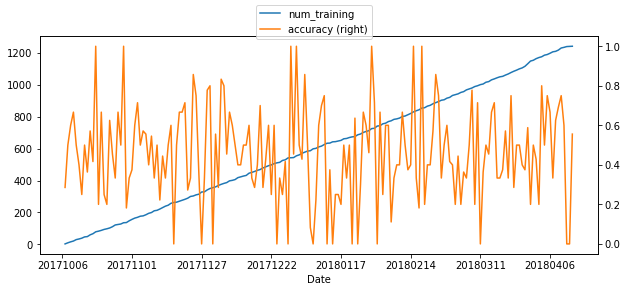

In [15]:
# Great! We've productionize this code a bit, or at least simulate a production deployment
# Let's do a bit of analysis to see how our model performs - as a daily average - throughout
# the time period of observations
daily_models_df[["num_training","accuracy"]].plot(secondary_y="accuracy", xlabel="Date", legend=False, figsize=(10, 4))
plt.gcf().legend(loc='upper center');

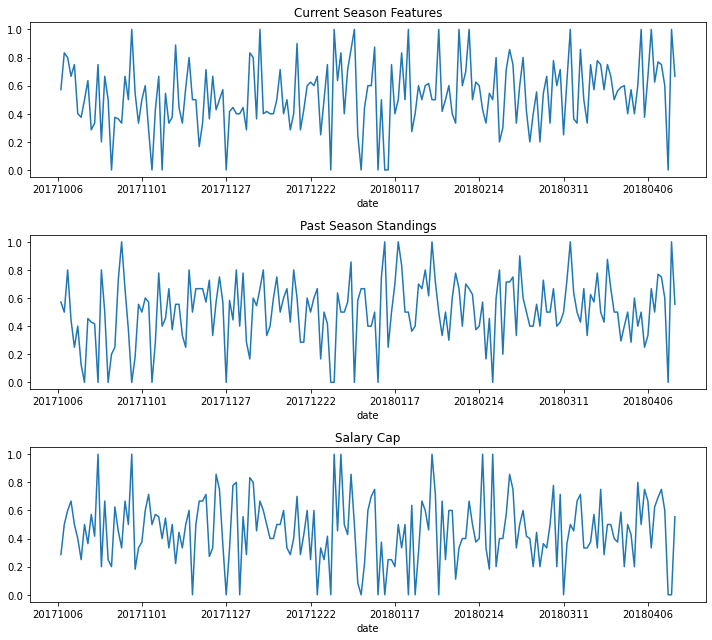

In [16]:
# So this was a bit surprising to me. I thought we would find a regularly increasing model, growing
# in accuracy as the number of training instances do. But while we see a bit of that in the begining,
# it doesn't hold for long and the model seems random throughout the whole date range.

# Generally, we would want to explore the model to understand which features might be performing
# well. The most common approach would be to inspect the coefficients for the regression models being
# produced. But given we have some buckets of features, we could also explore the accuracy as it 
# relates to these buckets. Let's give that a shot.

# First, I'm going to silence a warning coming from sklearn with respect to convergence of our
# logistic regression model. It's important if you are considering using these models, but given the
# number of models we are creating it will add a lot of noise to the output
from warnings import simplefilter
simplefilter(action='ignore')

# Let's build models with just the previously seen performance this season
cur_season_model=pd.DataFrame(observations.groupby("date").apply(model_by_date, ['home_lost', 'home_won', 'away_lost', 'away_won']))

# Now let's build models with just the last season's information in it
past_season_features=set(observations.columns)-set(('home_lost', 'home_won', 'away_lost', 'away_won', 'home_cap', 'away_cap', 'outcome_categorical','date'))
past_season_model=pd.DataFrame(observations.groupby("date").apply(model_by_date, past_season_features))

# Now let's just look at the salary cap information
salary_cap_model=pd.DataFrame(observations.groupby("date").apply(model_by_date, ['home_cap', 'away_cap']))

# Let's plot their accuracies
fig, ax = plt.subplots(3, figsize=(10, 9))

ax[0].set_title("Current Season Features")
cur_season_model["accuracy"].plot(ax=ax[0])
ax[1].set_title("Past Season Standings")
past_season_model["accuracy"].plot(ax=ax[1])
ax[2].set_title("Salary Cap")
salary_cap_model["accuracy"].plot(ax=ax[2])
plt.tight_layout();

In [17]:
# A question that's very hot in the machine learning literature these days
# is the issue of bias in predictive models. Is the model biased when predicting
# the outcomes of one or more groups? Generally, the focus is on societal
# groups where such bias might reinforce inequities where we might not expect
# or desire it. But the issue of bias can be generalized from there, to consider
# the cases where the model performs poorly, and thus shouldn't be used.

In [23]:
# Actually, this dataset is interesting in that regard, one of our teams - 
# the Vegas Golden Knights - has a lot of missing information.
# You'll recall that we imputed this as the average of all of the
# other team's salary cap data. Is that reasonable? More generally, with
# respect to the games the Vegas Golden Knights were playing in, do our predictive
# models have poor accuracy?

def model_by_game(row):
    """Returns the teams involved and the model accuracy for a given entry
    in the observations DataFrame.
    :param row: A single game from the global observations DataFrame
    :param gametime: The time the game is played
    :return: A dict in the form of {"teams":["home team name","away team name"],
                                   "correct_prediciton":True}
    """
    # Let's get all of the data from games before this one. In this case we will assume
    # the game has ended and that we know all of the information from previous
    # games
    training_df=observations[observations.index<row.name]
    features_list=set(training_df.drop(['outcome_categorical','date'], axis='columns').columns)

    # We want to build a model for single games, but we run into a problem like
    # we did with data before. This time it's a bit different, we need to make sure
    # that we see at least two different labels to classify - one where the away team
    # has won and one where the home team has won. Otherwise the classifer doesn't
    # know how to label our data. The approach I'll take here is just to try and
    # classify the data, but if there is an error I'll just send back empty data.
    try:
        # Now, we're specifically interested in the teams which played, but we scrubbed
        # this information from our model! But it turns out we have a mapping between
        # teams and this data, because we've captured the league ranking from last year,
        # and that value is going to be an np.nan for the Golden Knights. Before we impute
        # it, let's make sure we are going to send back these team identifiers       
        retvals=[{"team":str(row["home_last_season_leagueRank"])},{"team":str(row["away_last_season_leagueRank"])}]

        # Let's build our model as before, first cleaning up the missing values
        training_df=training_df.fillna(training_df.mean())
        testing_df=row.fillna(training_df.mean())

        # Now train a model
        from sklearn.linear_model import LogisticRegression
        features=training_df[features_list]
        target=training_df['outcome_categorical']
        clf=LogisticRegression()
        reg=clf.fit(features,target)

        # And now lets evaluate its accuracy
        from sklearn.metrics import accuracy_score
        labels=testing_df['outcome_categorical']
        predictions=reg.predict((testing_df[features_list].values,))

        # Let's return the accuracy, as well as the team names
        retvals[0]["correct_prediction"]=(labels==predictions[0])
        retvals[1]["correct_prediction"]=(labels==predictions[0])
        return pd.DataFrame(retvals)
    except:
        # An error of some kind, likely that the classifier hasn't seen enough data to run
        return pd.DataFrame([{"team":None, "correct_prediction":None},{"team":None, "correct_prediction":None}])

model_results=observations.apply(model_by_game, axis="columns")

# And this will be a series of nested results, so let's just collapse that to a
# single dataframe
df=pd.DataFrame()
for i in range(len(model_results)):
    df=df.append(model_results.iloc[i])
df.head()

,team,correct_prediction
0,None,None
1,None,None
0,2.0,False
1,10.0,False
0,8.0,False


In [19]:
# All right, now that we have a dataframe which has our teams and whether they
# have had a correct prediction or not, we can group by the team identifier and
# apply an aggregation function to determine how many times the model was correct
# for that given team. We can use the numpy count_nonzero function to do this,
# as a true value is represented by a 1 in numpy, while a false value is represented
# with a zero
df.groupby("team").agg({"correct_prediction":np.count_nonzero}).sort_values("correct_prediction")

,correct_prediction
team,
12.0,30
30.0,30
5.0,33
4.0,35
28.0,35
8.0,36
29.0,36
7.0,37
17.0,38


In [20]:
# Ok! So we see that this model has some bias when making predictions, in particular it
# is a poor predictor for matches where team 12 and 30 are in, and it's a better
# predictor for games where team 19 and 9 are involved. Our np.nan which are the Vegas 
# Golden Knights, and is a pretty chance predictor. None of these are amazing values,
# as we know, given that our model isn't so great, but this is one way to see if that
# bias is well spread throughout the model. Keep in mind, each team plays roughly 84
# games in this dataset.

# So this of course begs the question, who is team 12 and 30, whom the model is most biased
# against when it comes to accurate predictions? Let's look.
pd.read_csv("assets/previous_season_standings.csv").query('(leagueRank==12) or (leagueRank==30)')["team.name"]

9        Ottawa Senators
22    Colorado Avalanche
Name: team.name, dtype: object